# Line_Search_Quadratic_Interpolation

Zibulevsky [youtube](https://www.youtube.com/watch?v=9Zejl2YzaYY)

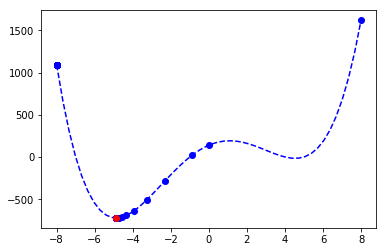

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x+7) * (x+1) * (x-4) * (x-5)

def quad_interpolation_poly_g(a, b, c, function_vals_as_list):
    # a: point where we know function value, a < b < c
    # b: point where we know function value, a < b < c
    # c: point where we know function value, a < b < c
    # function_vals_as_list = [f(a), f(b), f(c)] 
    
    # when this function is called
    # a, b, and c satisfy V-combination condition
    # guaranteeing there is a unique quadratic interpolation polynomial g
    
    A = np.array([[a**2, a, 1],
                  [b**2, b, 1],
                  [c**2, c, 1]])
    d = np.array(function_vals_as_list).reshape((-1,1))
    
    # return values: np.array([[quadratic_coeff], [linear_coeff], [intercept]])
    return np.dot(np.linalg.inv(A), d)

def find_root_of_g_prime(g_coeff):
    # g_coeff : coefficients of quadratic polynomial g
    #           np.array([[quadratic_coeff], [linear_coeff], [intercept]])
    
    # find root of g_prime and return
    alpha, beta = g_coeff[0,0], g_coeff[1,0]
    return - beta / (2*alpha) 

def quadratic_interpolation(a, b, c, tol):
    # a: a<b<c with V-combination, i.e., f(b) < f(a) and f(b) < f(c)
    # b: a<b<c with V-combination, i.e., f(b) < f(a) and f(b) < f(c)
    # c: a<b<c with V-combination, i.e., f(b) < f(a) and f(b) < f(c)
    
    # check V-combination condition
    if (f(a) <= f(b)) or (f(c) <= f(b)):
        raise ValueError("Your initial choice of a, b, c is bad, not V-combination")
    
    history_a = [a]
    history_c = [c]
    while c-a > tol:
        g_coeff = quad_interpolation_poly_g(a, b, c, \
                                            function_vals_as_list=[f(a), f(b), f(c)])
        root = find_root_of_g_prime(g_coeff)
        
        # if the root of g' is in [a,b] 
        if (a<root) and (root<b):
            # if a, root, b satisfy V-combination condition 
            if (f(a)>f(root)) and (f(root)<f(b)): 
                b, c = root, b
            else:
                a = root
        # if the root of g' is in [b,c]
        else:
            # if b, root, c satisfy V-combination condition 
            if (f(b)>f(root)) and (f(root)<f(c)):
                a, b = b, root
            else:
                c = root

        history_a.append(a)
        history_c.append(c)
        
    sol = (a+c)/2       
    return sol, np.array(history_a), np.array(history_c)

def plot_quadratic_interpolation(sol, history_a, history_c):
    a = history_a[0]
    d = history_c[0] 
    x = np.linspace(a, c)
    plt.plot(x, f(x), '--b')
    plt.plot(history_a, f(np.array(history_a)), 'ob')
    plt.plot(history_c, f(np.array(history_c)), 'ob')
    plt.plot(sol, f(sol), 'o-r')
    plt.show()


if __name__ == "__main__":
    a = -8.
    b = 0.
    c = 8.
    tol = 1e-6
    
    sol, history_a, history_c = quadratic_interpolation(a, b, c, tol)
    plot_quadratic_interpolation(sol, history_a, history_c)